In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd


In [3]:
lifestyle_data = pd.read_csv('L&R.csv')
rel_col = ['Which of the following extracurriculars did you regularly (e.g. at least biweekly) engage in throughout the term? (Select all that apply)']
df = lifestyle_data[rel_col].dropna().rename(columns={'Which of the following extracurriculars did you regularly (e.g. at least biweekly) engage in throughout the term? (Select all that apply)': 'extrac'})
df.head()

,extrac
0,Arts
1,Arts
2,Arts
3,Clubs
4,Clubs


In [4]:
distribution = df.dropna().groupby('extrac')['extrac'].count()
distribution

extrac
Arts                      4
Clubs                    14
Design Team              17
Gym                       1
Hangouts with Friends    78
Sports                   25
Syde Projects            26
Volunteer Work            3
Name: extrac, dtype: int64

In [5]:
dfex = pd.DataFrame ({
    'Type' : ['Arts','Clubs','Design Team', 'Hangouts with Friends', 'Sports', 'Syde Projects'],
    'Value' : [4,14,17,78,25,26]
})

In [6]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    dfex['Value'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

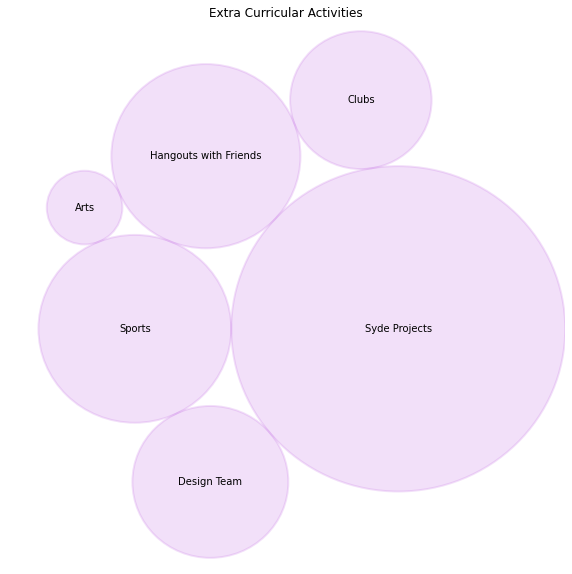

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Extra Curricular Activities')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = dfex['Type']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, color='#C067E2'))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

In [8]:
ax.figure.savefig('graphs/Extra_Curricular.png')